# **Build Regression (Linear,Ridge,Lasso) Models in NumPy Python**

## **Project Overview**



The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game.
With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.


<br>

![image](https://cdn.pixabay.com/photo/2016/04/15/20/28/football-1331838__340.jpg)

<br>


Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems.

This project explains how linear regression works and how to build various regression models such as linear regression, ridge regression, lasso regression, and decision tree from scratch using the NumPy module.

## **Learning Outcomes**

* Understand the importance of preprocessing data and remove correlated features and drop rows with missing data from the dataset.

* Understand the need for splitting data into training and test sets and write a function to create a train-test split from scratch using NumPy.

* Use the train-test split function to split the dataset into training and testing sets.

* Understand the differences between linear, ridge, and lasso regression models and their respective loss functions.

* Write classes for linear, ridge, and lasso regression models from scratch using NumPy.

* Train the linear, ridge, and lasso regression models using the training data.
Use the trained models to predict the output for the testing set and evaluate the performance of the models using the mean squared error and R-squared metrics.

* Compare the performance of the three regression models and select the best model based on the evaluation metrics.

## **Approach**

* Importing the required libraries and reading the dataset.
* Data pre-processing
  * Removing the missing data points
  * Dropping categorical variables
  * Checking for multi-collinearity and removal of highly correlated features
* Creating train and test data by randomly shuffling data
* Performing train test split
* Model building using NumPy
  * Linear Regression Model
  * Ridge Regression Model
  * Lasso Regression Model

## **Important Libraries**

* **pandas**: pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language. Refer to [documentation](https://pandas.pydata.org/) for more information.

* **NumPy**: The fundamental package for scientific computing with Python. Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. Refer to [documentation](https://numpy.org/) for more information. pandas and NumPy are together used for most of the data analysis and manipulation in Python.

## **Install Packages**

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

## **Data Reading from Different Sources**

In [352]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
df = pd.read_csv('C:/Users/DELL/EPL_Soccer_MLR_LR.csv')


print("ACTUAL DF SHAPE : ", df.shape)


ACTUAL DF SHAPE :  (217, 13)


## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match


In [355]:
# checking the first 5 rows and columns

df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64


In [357]:
# checking the last 5 rows and columns

df.tail()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Preprocessing**

### **Handling Missing Values**

Handling missing values is an important step in data preprocessing. Missing data can lead to biased results or affect the performance of machine learning models. There are several ways to handle missing values such as:

* Dropping missing values: This approach involves dropping the rows or columns that contain missing values. However, this method may lead to loss of information, especially if a large number of rows or columns have missing values.

* Imputing missing values: This approach involves filling in the missing values with a value that is either derived from other observations or estimated using statistical methods. Common imputation methods include mean imputation, median imputation, and regression imputation.

* Using advanced methods: There are more advanced methods for handling missing data such as multiple imputation, k-nearest neighbors imputation, and matrix completion. These methods can be more accurate than simple imputation methods, but they may also be more computationally intensive.

In general, the choice of how to handle missing values will depend on the specific problem and dataset. It is important to carefully consider the impact of missing values on the analysis and choose an appropriate method that balances the need for accurate results with the computational complexity of the method.





In [361]:
#Lọc các hàng trống ( Nah)
# Data cleaning by dropping rows with all nulls
#dropping Null and removing categorical columns

df.dropna(axis=0, how='all', subset=None, inplace=True)


In [363]:
# checking the first 5 rows and columns

df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64


In [365]:
# checking the last 5 rows and columns

df.tail()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90.0,27.56,67.2,82.0,183.9,93.2,11.79
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38.0,23.76,56.5,72.0,183.5,80.0,10.05
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122.0,22.01,47.6,68.0,183.1,73.8,8.51
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233.0,22.34,60.4,63.0,178.4,71.1,11.50
201,"Sadlier, Mr. Matthew",LIV,5.38,6.3,46.0,15.7,32.0,21.07,34.9,72.0,190.8,76.7,6.26


In [367]:
print(df.shape)

(202, 13)


In [369]:
#Lọc các cột có giá trị chuỗi, giữ lại cột có giá trị số

new_df = df.select_dtypes(['number'])
new_df


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64
...,...,...,...,...,...,...,...,...,...,...,...
197,4.90,7.6,45.6,16.0,90.0,27.56,67.2,82.00,183.9,93.2,11.79
198,5.66,8.3,50.2,17.7,38.0,23.76,56.5,72.00,183.5,80.0,10.05
199,5.03,6.4,42.7,14.3,122.0,22.01,47.6,68.00,183.1,73.8,8.51
200,4.97,8.8,43.0,14.9,233.0,22.34,60.4,63.00,178.4,71.1,11.50


In [371]:
# Hình dạng dữ liệu sau khi lọc

print(new_df.shape)


(202, 11)


### **Finding Correlated Features**

In the context of regression models, finding and removing correlated features is an essential step in preprocessing the data. Correlation is a statistical measure that describes how strongly two variables are related to each other. In the case of features, if two features have a high correlation with each other, it means that they provide similar information to the model, which can cause issues such as overfitting, multicollinearity, and reduced interpretability.

To find correlated features, we typically calculate a correlation matrix between all pairs of features. We can use tools such as NumPy's corrcoef function or Pandas' corr method to compute the correlation matrix. Once we have the correlation matrix, we can identify highly correlated feature pairs by looking at the absolute values of the correlation coefficients.

To know more about Multicollinearity and its affects, please go through the [Linear Regression Model Project in Python for Beginners Part 2 Notebook](https://s3.amazonaws.com/projex.dezyre.com/multiple-linear-regression-project-for-beginners/materials/regression_part2_.ipynb).

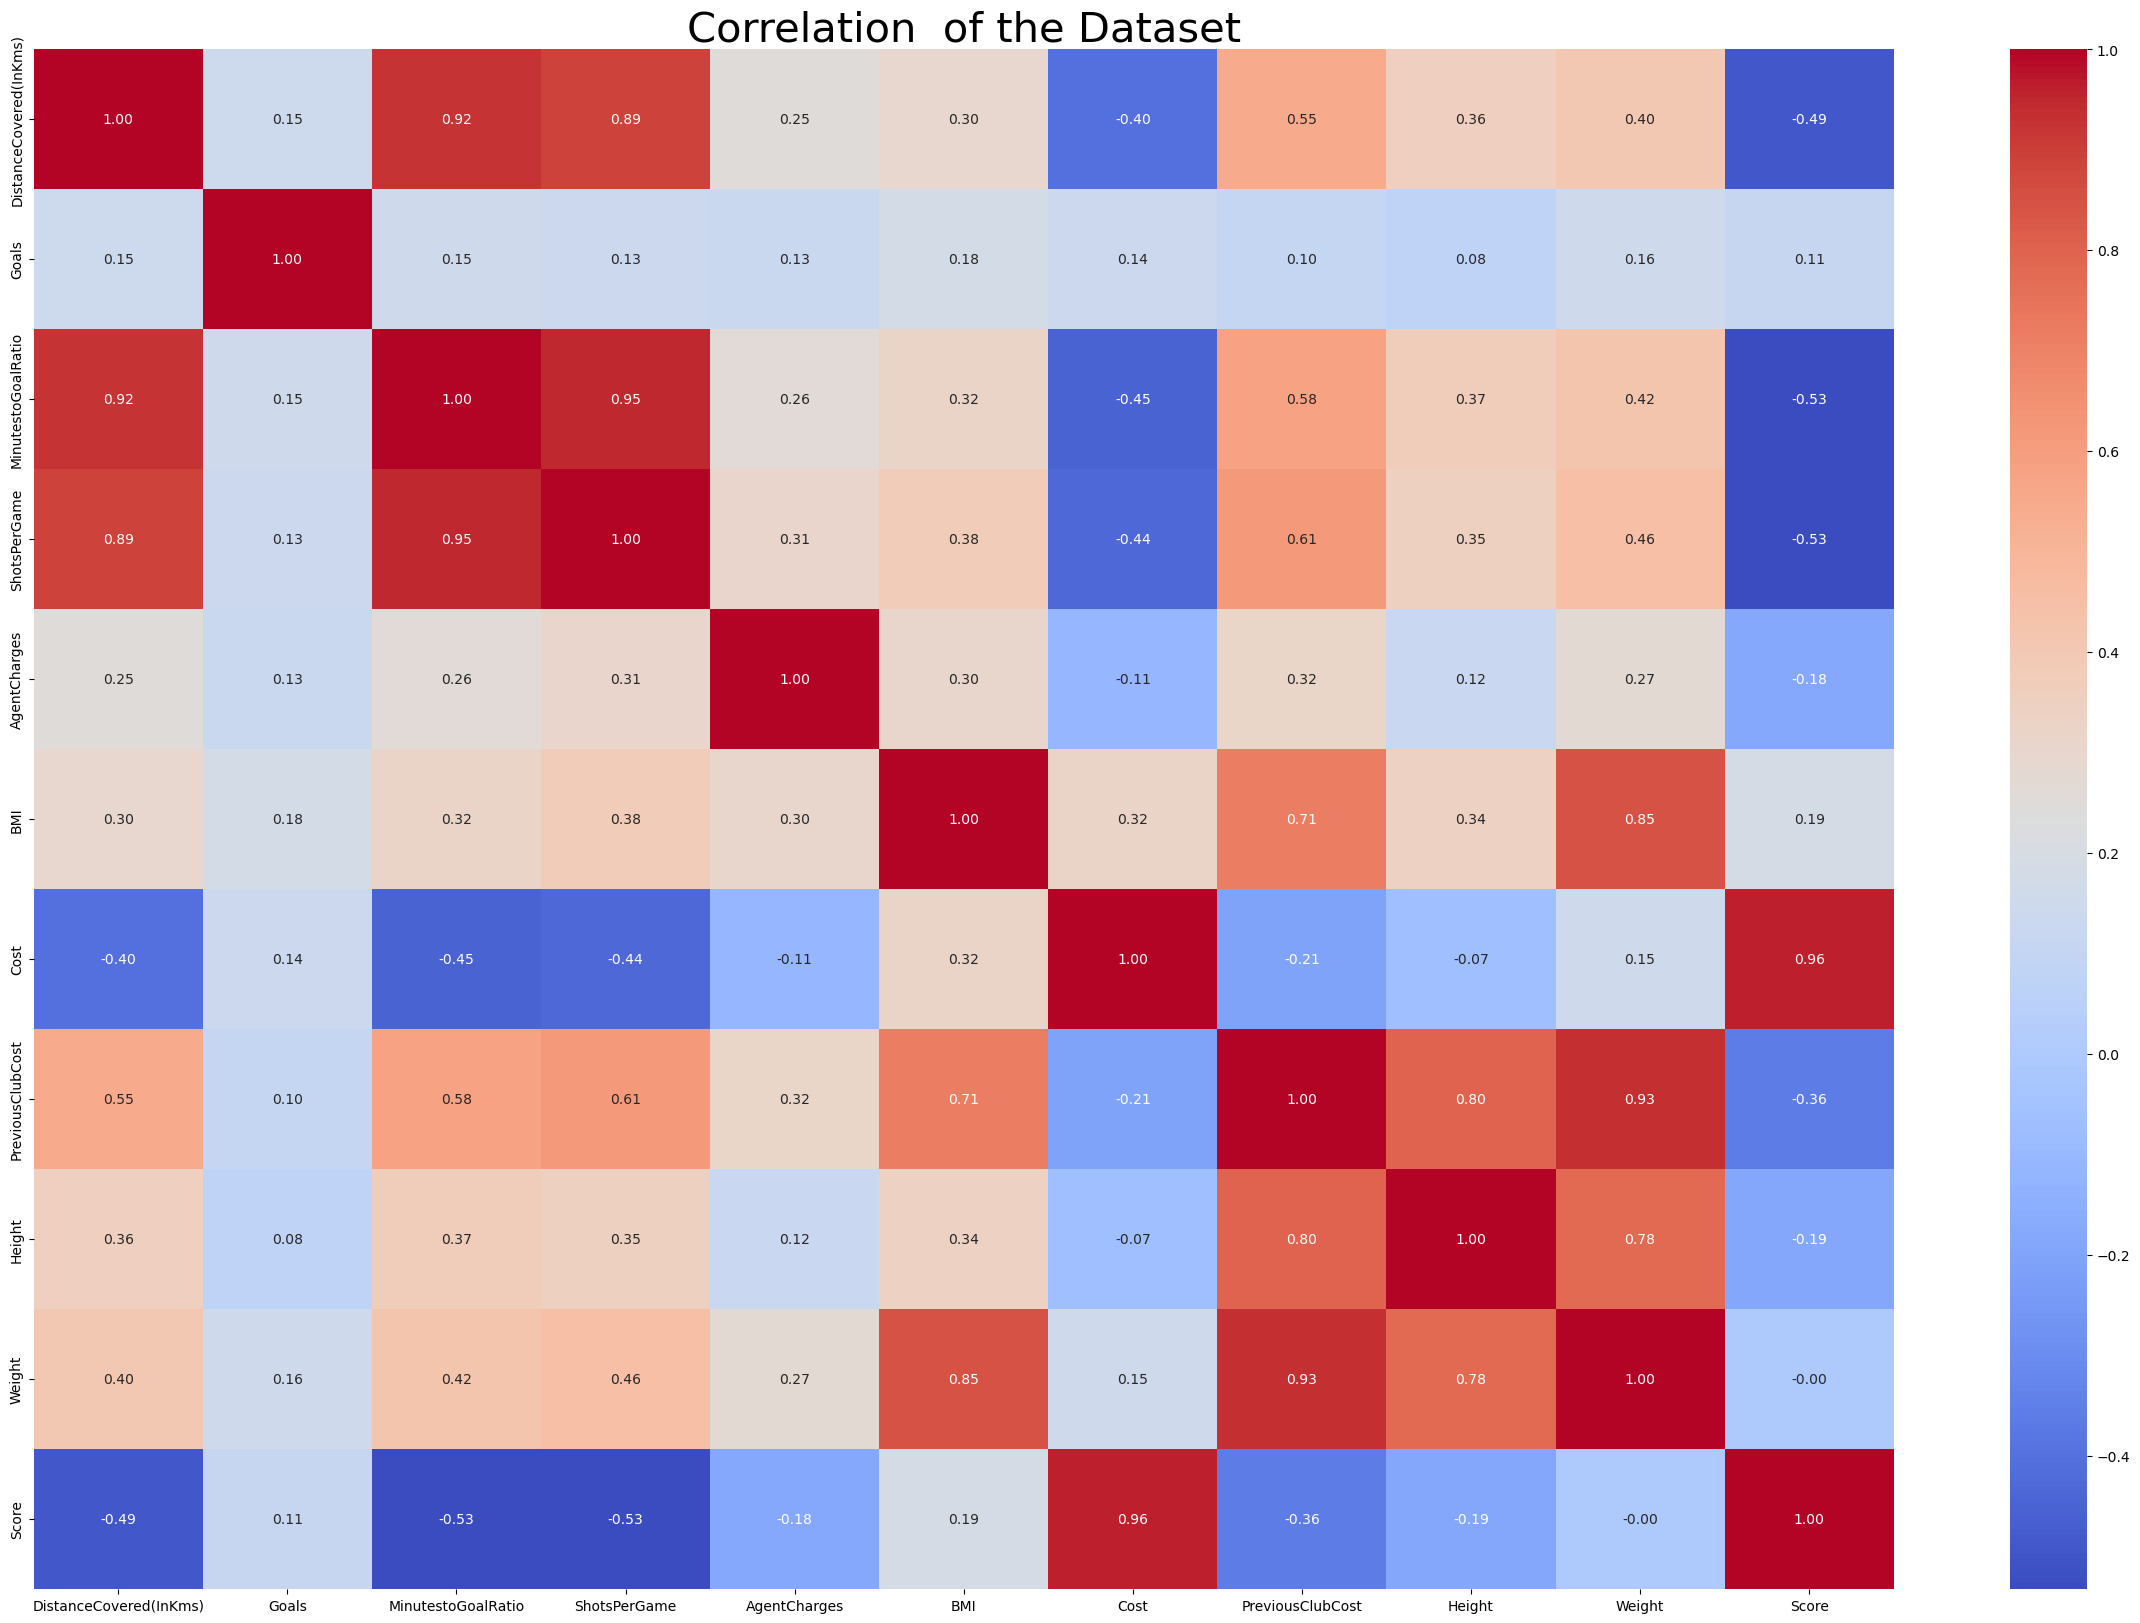

In [374]:
# Vẽ sơ đồ nhiệt giá trị tương quan
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(new_df.corr(), annot = True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation  of the Dataset', fontsize = 30)
plt.show()

Correlated Features (with correlation > 0.8):


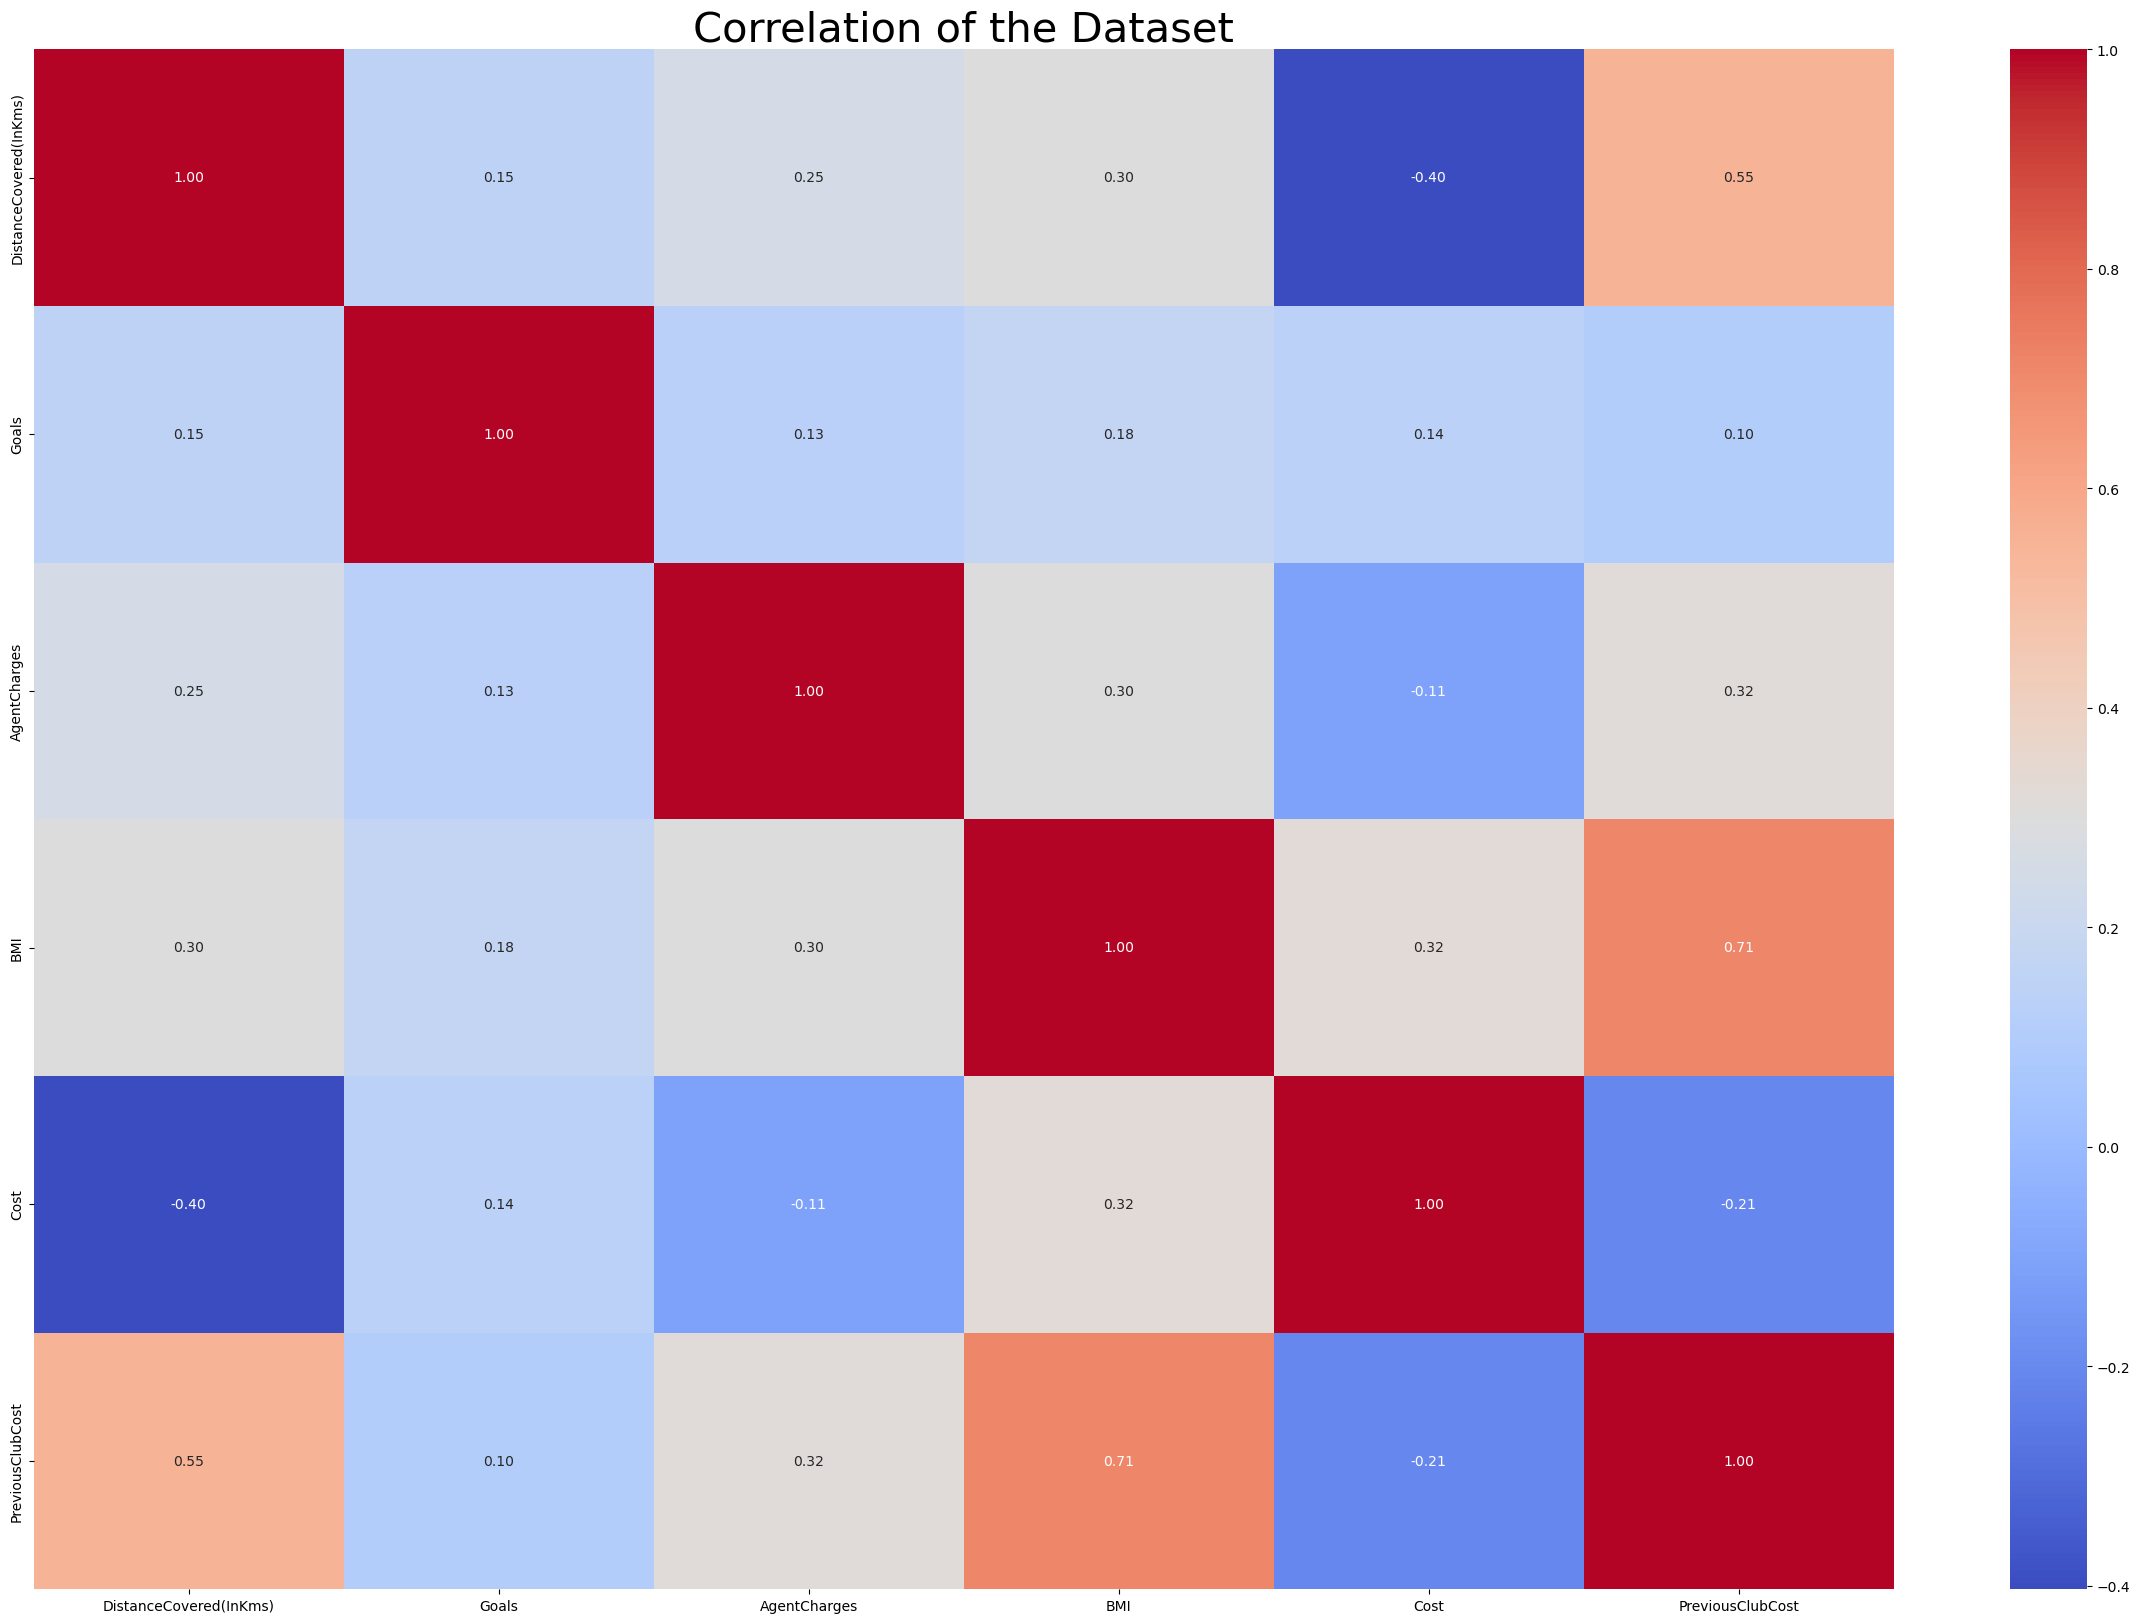

In [375]:

# Tính toán ma trận tương quan
correlation_matrix = X.corr()

# Thiết lập một ngưỡng tương quan để tìm các cặp đặc trưng có tương quan mạnh
threshold = 0.8  # Bạn có thể điều chỉnh ngưỡng này

# Tìm các cặp đặc trưng có tương quan mạnh và lưu vào tập hợp
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_features.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# In ra các cặp đặc trưng tương quan mạnh

print("Correlated Features (with correlation > {}):".format(threshold))

for feature_pair in correlated_features:
    print(feature_pair)

# Vẽ heatmap cho ma trận tương quan
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation of the Dataset', fontsize=30)
plt.show()

In [376]:
# Xuất ma trận tương quan

correlation_matrix

,DistanceCovered(InKms),Goals,AgentCharges,BMI,Cost,PreviousClubCost
DistanceCovered(InKms),1.000000,0.147098,0.250865,0.299471,-0.403004,0.550975
Goals,0.147098,1.000000,0.131973,0.177032,0.137131,0.102734
AgentCharges,0.250865,0.131973,1.000000,0.302556,-0.108243,0.317581
BMI,0.299471,0.177032,0.302556,1.000000,0.321116,0.713858
Cost,-0.403004,0.137131,-0.108243,0.321116,1.000000,-0.207749
PreviousClubCost,0.550975,0.102734,0.317581,0.713858,-0.207749,1.000000


In [378]:
# Finding correlated features
X = new_df.iloc[:,:-1] # independent features
y = new_df.iloc[:,-1] # dependent feature

print("org shape of X : ", X.shape)

correlated_features = set()
correlation_matrix = X.corr()

org shape of X :  (202, 10)


In [382]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8: #positively or negatively correlated
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Correlated Features : ", correlated_features)

Correlated Features :  {'MinutestoGoalRatio', 'Height', 'ShotsPerGame', 'Weight'}


In [384]:
# Dropping Correlated features from X
X.drop(columns=correlated_features, axis=1, inplace=True)
print("Shape of X after dropping correlated features : ", X.shape)

Shape of X after dropping correlated features :  (202, 6)


## **Train - Test Split**

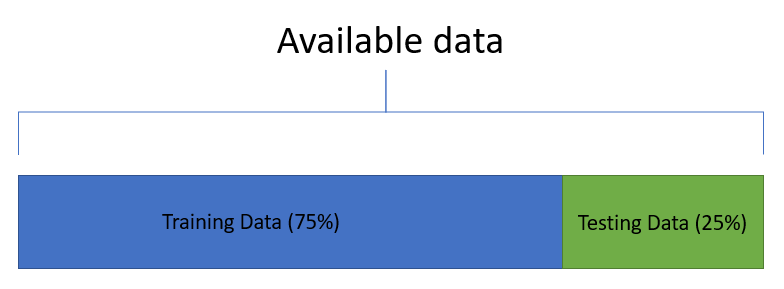


The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

In this project we are taking 80:20 ratio of train and test data.

<br>



In [387]:
# Creating Train and Test data

def shuffle_data(X, y, seed=None):
    """
    Randomly shuffles the samples in X and y.
    """
    # Set seed for random number generator if provided
    if seed:
        np.random.seed(seed)

    # Create an array of indices that correspond to the samples in X and y
    idx = np.arange(X.shape[0])

    # Randomly shuffle the indices
    np.random.shuffle(idx)

    # Return the shuffled input features and target variable
    try:
        return X[idx], y[idx]
    except:
        return X.iloc[idx], y.iloc[idx]


#### **Shuffle Data: Code Explanation**

The `shuffle_data()` function takes three parameters: `X`,` y`, and `seed`. `X` and `y` are the input features and target variable, respectively, which can be either an `ndarray` or a` DataFrame`. The `seed` parameter is an optional integer that can be used to set the seed for the random number generator.

The function first checks if a seed has been provided, and if so, sets the seed for the random number generator. Then, it creates an array of indices that correspond to the samples in `X` and `y` using the `arange()` function from NumPy. Next, it uses the `shuffle()` function from NumPy to randomly shuffle the indices.

Finally, the function returns the shuffled input features and target variable. If `X` and `y` are DataFrame objects, the function uses the `iloc[]` indexer to retrieve the shuffled data.


In [390]:
def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    
    # Chia dữ liệu thành tập huấn luyện và kiếm tra
    """
    Splits the data into training and test sets. 
    """

    if shuffle:
        # shuffle the data
        X, y = shuffle_data(X, y, seed)

    # Split the training data from test data in the ratio specified in test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test


#### **Train Test Split: Code Explanation**

This function takes in the input feature matrix `X` and the target variable `y` and splits the data into training and test sets. The proportion of the data to be included in the test set is specified by the `test_size` parameter, which defaults to 0.5. If `shuffle` is set to True, the data is shuffled before splitting. A random seed can be specified using the `seed` parameter.

The `len(y)` returns the number of rows in the target variable `y`. The `//` operator performs floor division, which means that the result of `len(y) // (1 / test_size)` is the number of rows that should be in the test set. The `int` function is used to convert this result to an integer.

`split_i` represents the index at which the data should be split, with the first split_i rows being used for training and the remaining rows being used for testing.

The code then uses slicing to split the input data `X` into the training and testing sets. The `X[:split_i]` notation selects the first `split_i` rows of the data, while `X[split_i:]` selects the remaining rows. Similarly, the target variable y is split using the same index.

The final result of the function is a tuple containing four arrays: X_train, X_test, y_train, and y_test, which represent the input and target variables for the training and testing sets.



In [393]:
# finally using the train_test_split() function to create a test set of 20% of the data with seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, seed=42)

## **Multiple Linear Regression**


Linear regression, often known as simple regression, creates a relationship between two variables. Linear regression is represented visually as a straight line, with the slope determining how a change in one variable affects a change in the other. A linear regression relationship's y-intercept reflects one variable's value when the other's value is 0.

Multiple linear regression estimates the relationship between two or more independent variables and one dependent variable.
$$\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$$

where $p$ is... number of features in the model.

* For any given independent variable (x) value, y is the dependent variable's predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y, when x is 0.
* $\beta_1$ is the regression coefficient of variable $x_1$, which tells us how much y will change as $x_1$ increases or decreases.
* $\beta_p$is the regression coefficient of the last variable $x_p$, which tells us how much y will change as $x_p$ increases or decreases.
* $x_1$ ... $x_p$ are the independent or predictor variables that help us predict y
* $\epsilon$ is the error left due to the incorrect calculation of the regression coefficients.


To understand the basics of Linear Regression, cost function and least squares, refer to the [Linear Regression Model Project in Python for Beginners Part 1 Notebook](https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/regression_part_1.ipynb) where Simple Linear Regression and the mathematics behind it have been explained in detail.




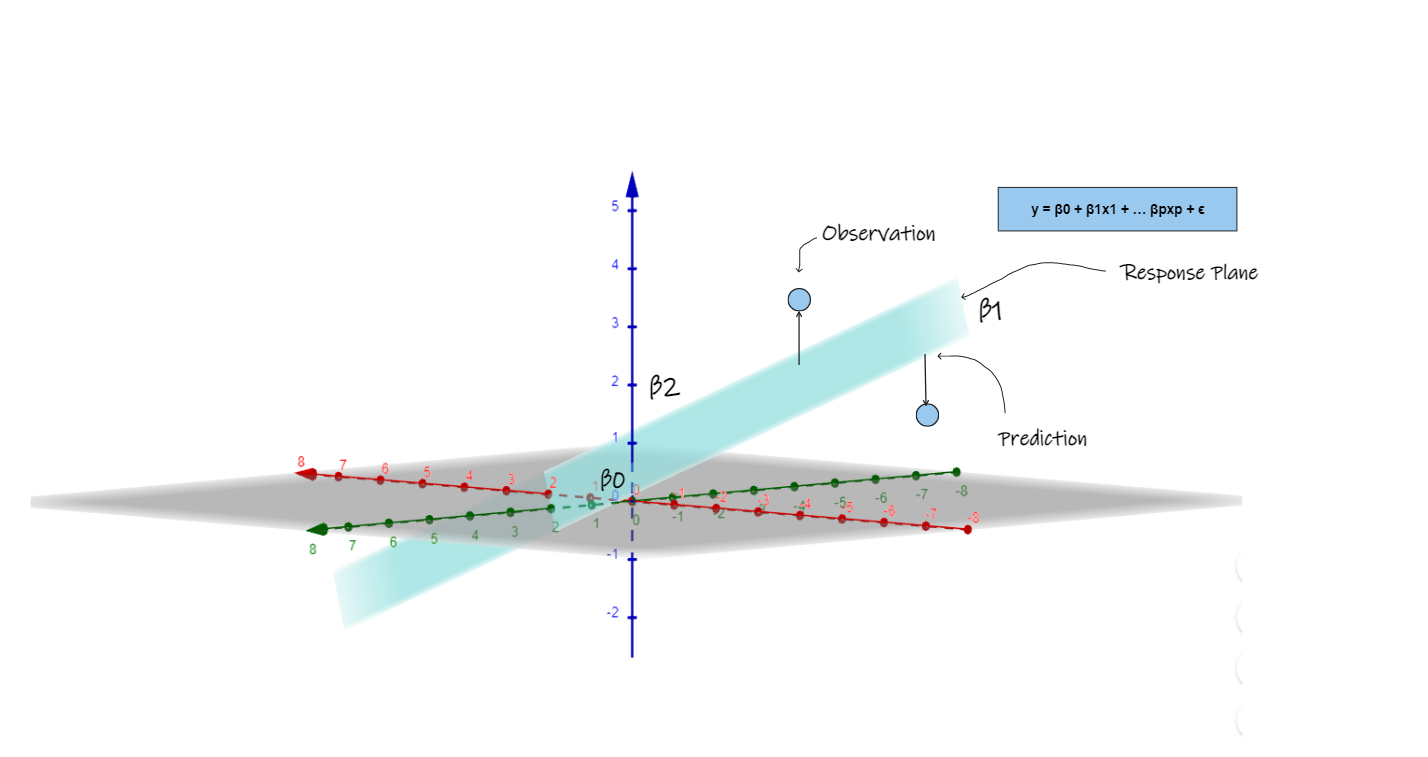

## **Errors in Regression**

The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.

Let's understand the various errors in Regression:


* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$

* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.

$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$


* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.

$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$


* The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.

$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

### **Model Comparisons**

* $R^2$: The $R^2$ or the coefficient of determination is the proportion of the variance in the dependent variable that is explained from the independent variable(s). $R^2$ is expressed between 0 and 1 for the level of variance explained.
As we learned in the previous section, the ratio $\frac{SSE}{TSS}$ should be low for a robust model, this ratio signifies the error or unexplained variance by the independent variable(s).
Mathematically, $R^2$ or explained variance can be expressed as:

$$ R^2 = 1 - \frac{SSE}{TSS} $$

* Adjusted $R^2$: For linear models, adjusted $R^2$ is a corrected goodness-of-fit statistic. It determines the proportion of variance in the target field explained by the input or inputs.
$R^2$ tends to overestimate the goodness-of-fit of the linear regression. It always grows as the number of independent variables in the model grows.
It happens because we tend to deduct a large amount (due to multiple variables) to calculate error as the number of independent variables increases. Hence, the ratio $\frac{SSE}{TSS}$ is even lower than it should be and  $R^2$ seems to be high but it might not be an appropriate model for production data. It is adjusted to account for this overestimation. Considering N as the total sample size and p as the number of independent variables, adjusted $R^2$ can be expressed as:

$$ \text{Adjusted }  R^2 = 1 - \frac{(1 - R^2)(N - 1)}{N - p - 1} $$

## **Regularization**

Before moving further ahead in the topic of Regularization, let us understand Underfitting and Overfitting properly.

* **Underfitting**: Underfitting occurs when a statistical model or machine learning algorithm fails to capture the underlying trend of the data, i.e., it performs well on training data but poorly on testing data. Its occurrence merely indicates that our model or method does not adequately suit the data. It frequently occurs when we select a simpler model yet the data contains complicated non-linear patterns or when there is insufficient data to develop a linear model. The obvious approach is to build a complex model or increase the number of linear features in the data.

* **Overfitting**: When a statistical model fails to produce correct predictions on testing data, it is said to be overfitted. When a model is trained with a large amount of data, it begins to learn from the noise and incorrect data entries in our data set. It usually occurs when we build a complex model on a simpler dataset.
An overfitted model performs well on training data because it has memorized the patterns in the data, but it performs poorly on testing data. An under-fitted model, on the other hand, will perform worse on both datasets because it is unable to capture the trends and patterns underlying the dataset when training.

**Regularization**

Avoiding overfitting is one of the most important tasks of training your machine learning model. If the model is overfitting, it will not be able to generalise and have a low accuracy in real time scenario. This occurs when your model is trying to grab too much information including the noise from your training dataset. By noise, we mean data points that aren't truly representative of your data's true properties, but are instead random chance. Learning such data points makes your model more adaptable, but it also increases the risk of overfitting. Regularization is a type of regression in which the coefficient estimates are constrained, regularised, or shrunk towards zero. In other words, in order to avoid overfitting, it pushes the model to be more simpler by reducing or shrinking the weights.




**Ridge or L2 Regularization**

In simple linear regression, an optimization function or loss function known as the residual sum of squares is used to create a model that accurately predicts the value of Y. (RSS). With the help of this loss function, the model learns. The difference between the actual value and the expected output is measured using the loss function. The coefficients are chosen that minimise the loss function when applied to the training data. The RSS is changed by adding the shrinkage quantity or a penality factor to the ridge regression. The penalty term in L2 regularisation is equal to the square of the coefficient magnitude so that a greater term is subtracted while updating to new coefficient value using optimization algorithm and a smaller value is achieved.



$$ RSS_{ridge} = \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $$

Here, the additional penalty term $\lambda \sum_{j=1}^{p} \beta_j^2$ is added to the RSS in order to shrink the parameter estimates towards zero, while still allowing some of the information from the original data to remain. The amount of shrinkage is controlled by the tuning parameter $\lambda$, which determines the strength of the penalty. As the $\lambda$ increases, the values of the parameters approaches zero.

**Lasso or L1 Regularization**

On the other hand, L1 regularisation, also known as Lasso Regression, alters the RSS by adding a penalty equal to the absolute value of the weight coefficients.


$$ RSS_{lasso} = \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} |\beta_j| $$

Here, the penalty term $\lambda \sum_{j=1}^{p} |\beta_j|$ forces some of the coefficients to be exactly equal to zero, effectively performing feature selection. The amount of shrinkage is again controlled by the tuning parameter $\lambda$.

**Differences between L1 and L2 Regularization**

* One of the primary differences between L1 and L2 regularization is the way that the penalty is applied to the coefficients. With L1 regularization, the penalty is applied to the absolute value of the coefficient, while with L2 regularization, the penalty is applied to the squared value of the coefficient. This difference in the penalty function means that L1 regularization tends to drive some of the coefficients to exactly zero, effectively performing feature selection, while L2 regularization only shrinks the coefficients towards zero, but does not usually make them exactly zero.

* Another difference between the two types of regularization is that L1 regularization tends to be more robust to outliers, while L2 regularization is more sensitive to them. This is because the L1 penalty is less affected by outliers, since the absolute value of the coefficient is always positive, while the L2 penalty is more influenced by outliers, since the squared value of the coefficient is always positive and grows more quickly than the absolute value as the coefficient becomes larger.

* The choice between L1 and L2 regularization will depend on your specific problem and dataset. In general, L2 regularization is a good default choice, but if you have a large number of features and suspect that many of them may be irrelevant or redundant, L1 regularization may be more effective.

Watch the video [Understanding Ridge and Lasso regression](https://www.projectpro.io/project/hackerday-project/project-title/build%20numpy%20regression%20models#sub-hackerday-video-3) for understanding.

### **How regularization techniques affect machine learning models?**


* The effect of lambda on the model:
Lambda is a tuning parameter that decides the amount of penalty to be added to the model. A small value of lambda may result in underfitting, while a large value may result in overfitting. The optimal value of lambda can be found using cross-validation. (A technique that will be introduced in later projects.)

* Feature selection: Lasso regularization has the unique property of setting some of the feature coefficients to zero, making it an effective feature selection method. Ridge regularization, on the other hand, does not have this property.

* Interpretation of the coefficients: Ridge regularization shrinks the coefficients towards zero, but does not set them exactly to zero. This means that all features contribute to the model to some extent. Lasso regularization, on the other hand, can completely eliminate some features from the model, making it easier to interpret.

## **Model Building with Numpy**

### **Linear Regression: Code Explanation**

The code is an implementation of linear regression using gradient descent as the optimization algorithm.

The class `LinearRegression` has two hyperparameters - `lr` and `n_iter`. `lr` stands for the learning rate, which determines the step size in the gradient descent algorithm. `n_iter` stands for the number of iterations that the algorithm will run. `self.weights` and `self.bias` have been initialized as None.

The `fit()` method is used to train the model on a given set of input features X and output variable y. The first step in the `fit()` method is to initialize the model parameters `self.weights` and `self.bias`. The weights are initialized as an array of zeros and the bias is initialized to 0.

The loop in the `fit()` method runs for `n_iter` iterations. In each iteration, the model makes a prediction `y_pred` for the given input `X`. Then, the gradients `dW` and `db` are computed using the prediction and the true values `y`. The gradients represent the direction of steepest ascent in the cost function. The weights and bias are then updated using the computed gradients and the learning rate `lr`.

The term `np.dot(X, self.weights)` represents the linear combination of the features in the input data `X` weighted by the coefficients `self.weights`. This dot product gives the predicted output value for each input sample. The term `self.bias` is added to the result of the dot product to give the final predicted output value.

In other words, the dot product of the input data and the model's learned coefficients gives a weighted sum of the input features, and the bias term is added to this to shift the prediction up or down by a constant amount. The resulting value is the predicted output for the given input sample.

The `predict()` method is used to make predictions on new data using the trained model. It takes input features `X` and returns the predicted output `y_pred`.


In [404]:


class LinearRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)

            # y = Wx+b

            # compute gradients
            dW = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples

            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


### **Ridge Regression: Code Explanation**

The code is similar to the Linear Regression code, but the only difference is the addition of the Ridge regularization term in the gradient calculation.

In the Ridge Regression, the cost function is defined as:

`cost = MSE + alpha * sum(W^2)`

where MSE is the mean squared error, W is the weight of the linear regression, and alpha is the regularization strength parameter.

The gradient of the cost function w.r.t W is calculated as:

`dW = (-(2np.dot(X.T,(y-y_pred))) + (2self.alpha*self.weights)) / n_samples`

where X is the input data, y is the true labels, y_pred is the predicted labels, and n_samples is the number of samples in the data. The gradient of the cost function w.r.t bias is calculated as:

`db = -2*np.sum(y_pred - y) / n_samples`



In [407]:
class RidgeRegression:
    def __init__(self, alpha =1, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.alpha = alpha
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)

            #cost = MSE + alpha*W**2

            # compute gradients
            dW = (-(2*np.dot(X.T,(y-y_pred)))+(2*self.alpha*self.weights)) / n_samples
            db = -2*np.sum(y_pred - y) / n_samples

            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

### **Lasso Regression: Code Explanation**

The code is an implementation of Lasso Regression, a linear regression algorithm with L1 regularization. The key differences from Ridge Regression include the cost function and the calculation of the weight gradients.

In Lasso Regression, the cost function includes an L1 regularization term (i.e., the absolute value of the weights) as opposed to an L2 regularization term (i.e., the square of the weights) in Ridge Regression. The cost function can be expressed as:

`cost = MSE + alpha * sum(|W|)`
Where MSE is the Mean Squared Error, alpha is the regularization strength, and W is the vector of weights.

The weight gradients are calculated as:
`dW = (-(2*np.dot(X.T,(y-y_pred))) + (self.alpha)) / n_samples`

Here, the absolute value of the weight is included in the regularization term by adding a constant `(self.alpha)` to the gradients. This ensures that some of the weights are forced to zero during training, effectively performing feature selection.

The bias term is updated as in the Ridge Regression algorithm.

In [410]:
class LassoRegression:
    def __init__(self, alpha =1, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.alpha = alpha
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        # cost = MSE + alpha*|W|

        for _ in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)

            # compute gradients
            dW = (-(2*np.dot(X.T,(y-y_pred)))+(self.alpha)) / n_samples
            db = -2*np.sum(y_pred - y) / n_samples

            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## **Model Implementation**

#### **Linear Model**

In [414]:
linear_model = LinearRegression(lr=.00001, n_iter=100)
linear_model.fit(X_train, y_train)
linear_predict = linear_model.predict(X_test)

In [416]:
linear_predict

array([13.52651862,  8.826137  , 11.76082141, 11.38120362, 24.87800019,
       11.510069  , 26.38325501, 12.04485167,  8.48976753, 13.45347018,
       25.43338534,  9.6334166 , 14.45580138, 18.50265399,  9.17589445,
       13.95364798,  9.54601633, 16.22816313,  8.0560115 , 12.93060113,
       18.40354559, 30.34837398,  8.45739681, 11.38342704,  7.64332294,
       11.36396265, 10.91255589,  9.08742177,  9.55959634, 23.61318086,
       10.29570465,  8.69116286, 15.23348766, 11.12476375, 23.95303139,
       11.33697437, 17.65551944, 12.54150308, 10.61551881,  8.57220104])

#### **Lasso Model**

In [419]:
# Khởi tạo mô hình Lasso Regression
lasso_model = LassoRegression(alpha=0.03, lr=0.00001, n_iter=100)

# Huấn luyện mô hình với dữ liệu huấn luyện
lasso_model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
lasso_predict = lasso_model.predict(X_test)

In [421]:
lasso_predict

array([13.06088756,  8.44585376, 10.72710759, 11.59714215, 27.0385081 ,
       10.75949089, 28.31434227, 12.01082131,  7.60245389, 13.65633251,
       27.93205764,  9.60753929, 14.98944187, 19.76684604,  8.60165902,
       12.62387962,  8.62436272, 17.41121762,  6.97003426, 12.77703464,
       19.45652898, 33.24745667,  7.61147206, 10.44403588,  6.92560558,
       10.74570598, 11.22042103,  7.54850715,  9.61454703, 24.96806512,
        8.57737179,  8.17836783, 15.88618658, 10.17587436, 26.03147031,
       10.26408564, 18.90303473, 11.87092157,  9.95972606,  7.80027618])

#### **Ridge Model**

In [425]:
# Khởi tạo mô hình Ridge Regression
ridge_model = RidgeRegression(alpha=0.03, lr=0.00001, n_iter=100)

# Huấn luyện mô hình với dữ liệu huấn luyện
ridge_model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
ridge_predict = ridge_model.predict(X_test)

In [427]:
ridge_predict

array([13.06088975,  8.44585627, 10.72710945, 11.59714409, 27.0385078 ,
       10.75949306, 28.31434128, 12.01082397,  7.60245542, 13.65633349,
       27.93205767,  9.60754169, 14.98944297, 19.76684692,  8.60166179,
       12.62387977,  8.62436427, 17.4112189 ,  6.97003663, 12.77703663,
       19.45652941, 33.24745536,  7.61147406, 10.44403742,  6.92560793,
       10.74570753, 11.22042257,  7.54850898,  9.61454963, 24.96806561,
        8.57737322,  8.17837051, 15.88618781, 10.1758769 , 26.03147104,
       10.26408664, 18.90303562, 11.87092153,  9.95972825,  7.80027865])

## **Model Evaluation**

#### **MSE**

In [431]:
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

#### **R2 Score**

The function `r2_score` takes two arguments `y_true` and `y_pred`, which represent the true and predicted values of the target variable, respectively. The function computes the correlation matrix between these two arrays using the `np.corrcoef` function from the NumPy library.

We are calculating the correlation matrix to measure the linear relationship between the predicted values and the true values. The correlation matrix is a square matrix where each element represents the correlation coefficient between two variables. In this case, we are interested in the correlation between the true values (y_true) and the predicted values (y_pred). The correlation coefficient ranges from -1 to 1, with 1 indicating a perfect positive correlation, 0 indicating no correlation, and -1 indicating a perfect negative correlation.

By calculating the correlation matrix, we can determine how well the predicted values match the true values. If there is a high positive correlation between the two, then the predicted values are a good fit for the true values, and the R-squared score will be close to 1. If there is a low correlation or a negative correlation, then the predicted values are not a good fit for the true values, and the R-squared score will be close to 0.

 Since `y_true` and `y_pred` are both 1-dimensional arrays, the correlation matrix has shape (2, 2).

The function then extracts the correlation coefficient (i.e., the off-diagonal element) from the correlation matrix using `corr_matrix[0, 1]`. This coefficient represents the strength and direction of the linear relationship between `y_true` and `y_pred`.

In other words Coefficient of Determination is the square of Coefficient of Correlation, and hence lastly we take `corr**2`.

In [435]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    print(corr_matrix)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [437]:
print("MSE of Linear Model : ", mean_squared_error(y_test, linear_predict))
print("MSE of Lasso Model : ", mean_squared_error(y_test, lasso_predict))
print("MSE of Ridge Model : ", mean_squared_error(y_test, ridge_predict))

MSE of Linear Model :  4.288101722760345
MSE of Lasso Model :  2.849692797681988
MSE of Ridge Model :  2.849694826129537


In [439]:
print("R2 Score of Linear Model : ", r2_score(y_test, linear_predict))
print("R2 Score of Lasso Model : ", r2_score(y_test, lasso_predict))
print("R2 Score of Ridge Model : ", r2_score(y_test, ridge_predict))

[[1.         0.96521229]
 [0.96521229 1.        ]]
R2 Score of Linear Model :  0.9316347693382256
[[1.         0.97366924]
 [0.97366924 1.        ]]
R2 Score of Lasso Model :  0.9480317900859903
[[1.         0.97366923]
 [0.97366923 1.        ]]
R2 Score of Ridge Model :  0.9480317788420329


### **Think about it -II**

How can we use regression models to make accurate predictions in the presence of outliers in the data? What are some techniques for detecting and handling outliers, and how do they affect the performance and interpretability of the regression models?

## **Try-it-out - I**


* Implement a polynomial regression model using the existing code for simple linear regression. You can do this by adding additional powers of the input variable to the feature matrix X, such as X^2, X^3, etc. You can then fit a linear regression model to this expanded feature matrix to obtain a polynomial regression model. If you need background on Polynomial Regression, watch the project, [Learn to Build a Polynomial Regression Model from Scratch](https://www.projectpro.io/project-use-case/polynomial-regression-model-in-python-from-scratch) and refer to it's notebook.

* Test the performance of the existing regression models on datasets with outliers. You can introduce outliers by randomly selecting some data points and changing their target values to be much higher or lower than the other values. You can then compare the performance of the regression models on the original dataset and the dataset with outliers to see how they are affected.

* Experiment with different hyperparameters for the ridge and lasso regression models, such as the alpha parameter and the learning rate. You can do this by training the models with different hyperparameter values and comparing their performance on the same dataset.

* Compare the results of regression models we built with the pre-built scikit-learn library regression models.

## **Linear Regression in Real Life**

There are many real-world applications of linear regression. Exploring some of the best Linear Regression real-world applications will help us comprehend the concept more clearly.

1. Humans are not an exception; everything has a shelf life. We can store vast amounts of information about a person's medical history and estimate how long they will live thanks to ongoing improvements in medical science technology and diagnostic tools.
The term "life expectancy" describes the number of years one can expect to live. This application is frequently used by insurance companies and public healthcare organizations to increase their productivity and achieve organizational goals.

2. A common method used by agricultural scientists to assess how fertilizer and water affect crop yields is linear regression.
For instance, researchers may vary the water and fertilizer applications in various fields to observe the effects on crop yield. A multiple linear regression model can be used with crop yield as the target variable and fertilizer and water as the predictor variables.

3. For professional sports teams, analysts use linear regression to gauge the impact of various training schedules on player performance. For instance, data scientists in the NBA may examine how various frequencies of yoga and weightlifting sessions each week affect a player's point total. With yoga and weightlifting sessions as the predictor variables and total points earned as the response variable, they could fit a multiple linear regression model. Here's another project that solves the same business problem, [Learn to Build a Polynomial Regression Model from Scratch](https://www.projectpro.io/project-use-case/polynomial-regression-model-in-python-from-scratch).


## **Interview Questions**


* What are the key steps involved in building a simple linear regression model in Numpy?

* What is the difference between simple linear regression and multiple linear regression, and how do you implement each in Numpy?

* How do you evaluate the performance of a linear regression model, and what are some of the key metrics to consider?

* How do you handle missing values in a dataset before building a regression model in Numpy?

* What is regularization, and why is it important in linear regression models? How do you implement regularization in Numpy?

* Can you explain the concept of gradient descent, and how it is used to optimize the parameters of a linear regression model?

* What are some of the assumptions underlying linear regression models, and how do violations of these assumptions affect the validity of the model?

* How do you extend linear regression to handle non-linear relationships between the features and the target variable?

* What is the difference between L1 and L2 regularization, and when is each one used?


<h1><center>Thank you for choosing ProjectPro!</center></h1>
